In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

(214, 10)

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.skew(numeric_only=True)

,0
RI,1.625431
Na,0.454181
Mg,-1.152559
Al,0.907290
Si,-0.730447
K,6.551648
Ca,2.047054
Ba,3.416425
Fe,1.754327
Type,1.114915


In [ ]:
data.duplicated().any()

np.True_

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(213, 10)

In [ ]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

 ### **Exploratory Data Analysis**

### **Count of different type of glasses**

In [ ]:
data['Type'].value_counts()

,count
Type,
2,76
1,69
7,29
3,17
5,13
6,9


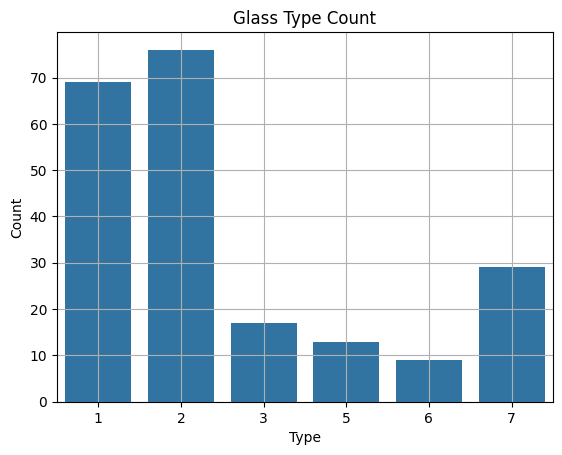

In [ ]:
sns.countplot(data=data,x='Type')
plt.title('Glass Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(visible=True)
plt.show()

## Model Building

In [ ]:
x = data.drop('Type',axis=1)
y = data['Type']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'y_test.shape : {y_test.shape}')

x_train.shape : (170, 9)
x_test.shape : (43, 9)
y_train.shape : (170,)
y_test.shape : (43,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [ ]:
acc_train = accuracy_score(y_train,y_train_pred)
acc_train

0.7411764705882353

In [ ]:
acc_test = accuracy_score(y_test,y_test_pred)
acc_test

0.6744186046511628

In [ ]:
clr_train = classification_report(y_train,y_train_pred)
print(clr_train)
clr_test = classification_report(y_test,y_test_pred)
print(clr_test)

              precision    recall  f1-score   support

           1       0.68      0.90      0.77        59
           2       0.77      0.75      0.76        61
           3       0.75      0.21      0.33        14
           5       0.88      0.70      0.78        10
           6       0.50      0.17      0.25         6
           7       0.89      0.80      0.84        20

    accuracy                           0.74       170
   macro avg       0.74      0.59      0.62       170
weighted avg       0.75      0.74      0.72       170

              precision    recall  f1-score   support

           1       0.53      1.00      0.69        10
           2       0.69      0.60      0.64        15
           3       0.00      0.00      0.00         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.67        43
   macro avg       0.49

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


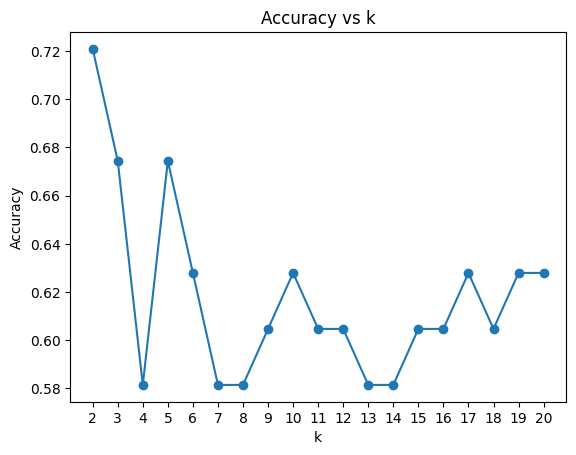

In [ ]:
k_values = range(2,21)
accuracy_scores = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  accuracy_scores.append(accuracy_score(y_test,y_pred))
plt.plot(k_values,accuracy_scores,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy vs k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train,y_train)
y_train_pred_new = knn.predict(x_train)
y_test_pred_new = knn.predict(x_test)

In [ ]:
acc_train_new = accuracy_score(y_train,y_train_pred_new)
acc_train_new

0.8058823529411765

In [ ]:
acc_test_new = accuracy_score(y_test,y_test_pred_new)
acc_test_new

0.6744186046511628